# In this notebook I would like to fit the Logistic regression, SVC, Decision trees and Neural networks  model to my cryptotheraphy dataset. Use the hyperparemeter tuning techniques namely Randomsearch cv and Grid seach CV and see the cost benefits .

# Import all the required libraries

In [8]:
# Common imports
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import f1_score, make_scorer
import warnings
warnings.filterwarnings("ignore")

np.random.seed(1)

# Load the data 

In [2]:
X_train = pd.read_csv("crypto_data_train_X.csv")
X_test = pd.read_csv("crypto_data_test_X.csv")
y_train = pd.read_csv("crypto_data_train_y.csv")
y_test = pd.read_csv("crypto_data_test_y.csv")

# Model the data

In [3]:
performance = pd.DataFrame({"model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1": []})

# Fit and test a Logistic Regression model

In [4]:
log_reg_model = LogisticRegression(max_iter=900)
_ = log_reg_model.fit(X_train, np.ravel(y_train))

In [5]:
model_preds = log_reg_model.predict(X_test)
c_matrix = confusion_matrix(y_test, model_preds)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"default logistic", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])
print(TN,TP,FN,FP)

11 12 0 4


# Fit and test SVC with Linear Kernel

In [6]:
svmmodel=SVC(kernel="linear").fit(X_train,np.ravel(y_train))
y_pred_svclin=svmmodel.predict(X_test)


In [7]:
c_matrix = confusion_matrix(y_test, y_pred_svclin)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"linear svm", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])]) 
print(TN,TP,FN,FP)

13 12 0 2


# SVC with RBF KERNAL

In [8]:
svm_rbf_model = SVC(kernel="rbf", C=10, gamma=0.01).fit(X_train,np.ravel(y_train))
y_pred_svcrbf=svm_rbf_model.predict(X_test)

In [9]:
c_matrix = confusion_matrix(y_test, y_pred_svcrbf)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"rbf kernal svm", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]}, index=[0])])
print(TN,TP,FN,FP)

11 11 1 4


# SVC WITH POLY KERNAL

In [10]:
svm_poly_model = SVC(kernel="poly", degree=3, coef0=1, C=10,gamma=0.01).fit(X_train,np.ravel(y_train))
y_pred_svcpoly=svm_poly_model.predict(X_test)

In [11]:
c_matrix = confusion_matrix(y_test, y_pred_svcpoly)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"poly kernal svm", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
  }, index=[0])])
print(TN,TP,FN,FP)

11 11 1 4


# Decision Trees

In [12]:
dtree = DecisionTreeClassifier().fit(X_train, np.ravel(y_train))
y_pred_dtree=dtree.predict(X_test)

In [13]:
c_matrix = confusion_matrix(y_test, y_pred_dtree)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"Decision Tree", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                 }, index=[0])])

print(TN,TP,FN,FP)   

10 11 1 5


# Evalution of results before Hyperparameter tuning.

In [14]:
performance

,model,Accuracy,Precision,Recall,F1
0,default logistic,0.851852,0.750000,1.000000,0.857143
0,linear svm,0.925926,0.857143,1.000000,0.923077
0,rbf kernal svm,0.814815,0.733333,0.916667,0.814815
0,poly kernal svm,0.814815,0.733333,0.916667,0.814815
0,Decision Tree,0.777778,0.687500,0.916667,0.785714


In [15]:
performance.sort_values(['Accuracy'])

,model,Accuracy,Precision,Recall,F1
0,Decision Tree,0.777778,0.687500,0.916667,0.785714
0,rbf kernal svm,0.814815,0.733333,0.916667,0.814815
0,poly kernal svm,0.814815,0.733333,0.916667,0.814815
0,default logistic,0.851852,0.750000,1.000000,0.857143
0,linear svm,0.925926,0.857143,1.000000,0.923077


In [16]:
performance.sort_values(['Precision'])

,model,Accuracy,Precision,Recall,F1
0,Decision Tree,0.777778,0.687500,0.916667,0.785714
0,rbf kernal svm,0.814815,0.733333,0.916667,0.814815
0,poly kernal svm,0.814815,0.733333,0.916667,0.814815
0,default logistic,0.851852,0.750000,1.000000,0.857143
0,linear svm,0.925926,0.857143,1.000000,0.923077


In [17]:
performance.sort_values(['Recall'])

,model,Accuracy,Precision,Recall,F1
0,rbf kernal svm,0.814815,0.733333,0.916667,0.814815
0,poly kernal svm,0.814815,0.733333,0.916667,0.814815
0,Decision Tree,0.777778,0.687500,0.916667,0.785714
0,default logistic,0.851852,0.750000,1.000000,0.857143
0,linear svm,0.925926,0.857143,1.000000,0.923077


In [18]:
performance.sort_values(['F1'])

,model,Accuracy,Precision,Recall,F1
0,Decision Tree,0.777778,0.687500,0.916667,0.785714
0,rbf kernal svm,0.814815,0.733333,0.916667,0.814815
0,poly kernal svm,0.814815,0.733333,0.916667,0.814815
0,default logistic,0.851852,0.750000,1.000000,0.857143
0,linear svm,0.925926,0.857143,1.000000,0.923077


# Analysis for evaluting my cost benefits and choosing the best metric for my model.
1. Firstly, my problem statement is result of the level of treatment whether it is benign or malignant.

2. It is a binary classifier. 

3. The models which i used are logistic regression, svm with linear rbf and poly kernels.

4. So, for evaluting classification problems the most common metrics(as per class discussed) that we will use to evaluate the performance are 

   1. Accuracy.
    
   2. Precision.

   3. Recall
    
   4. F1 score.

5. Let us see what each of this mean:
    
    accuracy:  Of all the predictions I made, how many were correct?
    
    precision: Of all the positive predictions I made, how many of them are truly positive?
    
    recall:  Of all the actual positive examples out there, how many of them did I correctly predict to be positive?
    
    f1 score: Harmonic mean of precision and recall; and provides a more balanced summation of a models performance.
    
6.  How ever , to calculate each of the metrics we need to see the confusion matrix values for each of the model
                                  
                                    TN       TP      FN      FP
        
    1. LOGISTIC REGRESSION           11       12      0        4
    
    2.  SVM LINEAR KERNEL            13       12      0        2
    
    3.  SVM RBF KERNEL               11       11      1        4
    
    4.  SVM POLY KERNEL              11       11      1        4
    
    5.  DECISION TREES               10       11      1        5
    
7.   Accuracy : If the data set is balanced perfectly then it can be considered as best metric.
     precision: FP>FN PRECISION BEST METRIC.
     RECALL :  FN>FP  Recall best metric
     F1 score:  If the data is not perfectly balanced and if we want to favour both precision and recall then we can consider f1 score as best metric.

8.   Let us consider the scenario of FP,FN TP,TN in my data sets.

   1. True positives :    The patients level of treatment is malignant  and the model also predicts malignant.
    
   2.  True negatives :   The patient  level of treatmnet is beningn then model also predicts beningn.

   3.  False positives :   The model predicts is beningn sucesful. but in reality it is malignant (un sucessful)
    
   4.  False negatives:    The model predicts is malignant unsucessful but in reality it is sucessful ( benign).

9.  Now my analysis for best metric.

 1. Accuracy: I am not considering the accuracy as best metric.
    
    reason:     There is no guarentee that the data is perfectly balanced. In my data set there is no much imbalance but there is some imbalance.
                This metric will performs best if it is perfectly balanced otherwise it will lead to failure.
                 This only deals with how many are right prediction it only deals with TN,TP not considering (TN+TP/TN+TP+FN+FP) FP,FN 
                  so i am eliminating this. because it is essnetial 
                to  consider FN AND FP as they are key to decide how far our model is correct.
        
 2. Precision :  If we observe from the above TN,TP,FN,FP values in all the cases FP>FN . But thats ok Coming to the real case scenario.
                 The model will tell that the treatment is sucessful. In real the treatment will be unsucessful.
                 The cost of false positives could be monetary, as patients may spend money on the treatment without any success, or emotional, 
                 as it may lead to disappointment and frustration. So, I am eliminating this from my choice.
    
 3.   Recall:  If we observe from the above values FN is not greater than FP . 
              Let us look from real scenario point of view. The model predicts the treatment was unsucessful
             but in real the treatment is sucessful. But u may tell if the model predicts unsucessful 
              in relaity if it sucessful it will good as there will be no loss for patients.
             but remember here is the health scenario. At any time every thing is unpredictable it totally depends upon the condition 
             and other health problems of patient.
             The cost of false negatives could be health-related, as patients may miss out on a potentially effective treatment.
            One more thing is as the model tells it is unsucessful. suppose this model if we are giving for a hospital.  
            As most of the treatments are not sucessful then the patients admitting to the hospital decreased 
            as they will not join before the treatment as they will not trust them
            becoz modle predicts unsucessful but in turn it is sucessful . 
            That we can know only after the treatment . 
            so it will also effect their business. since less people will admit gradually the people admitting to hospitals decreased.
            If the machine learning model used by a hospital predicts a low success rate for treatments, 
            it could lead to decreased patient admissions. Patients may not trust the hospital and choose not to admit themselves for treatment. However, there's a possibility that the actual success rate is higher than what the model predicts, which can only be known after the treatment. This can ultimately affect the hospital's business as fewer people admit themselves gradually.
            It's important to keep in mind that machine learning models, including language models like me, aren't perfect
            and may sometimes provide inaccurate predictions. In healthcare settings, 
            it's crucial to carefully consider the potential impacts of using such models and weigh the benefits against the risks.
            It's also important to communicate the limitations of the model to patients and healthcare providers 
            so that they can make informed decisions. Ultimately, medical professionals should use their expertise and judgement to make decisions
            based on the patient's unique circumstances and needs, 
            while also considering the predictions made by the machine learning model.
            And also if we see recall is overfitting for logreg and linear svm models.
            So, I am not considering recall also best metric.

4.  F1 score:  If we dont have perfectly balanced data set and also i am equally leverising the cost benefits for both FN,FP costs. 
                So I am choosing F1 score as best metric.

# For my dataset I am choosing that F1 score as best metric.

 Let us see that from abov results based on F1 score linear svm is performing best among all models.

 How ever, we havent done any hyper parameter tuning and checked the results these are the results before hyper parameter tuning.

 Now let us do hyper parameter tuning  using  random and grid search cv to optimise the f1 score and select the best performing model.

# Hyper parameter tuning 

##  F1 METRIC USING RANDOM SEARCH CV FOR LOG REGRESSION MODEL.

In [19]:
score_measure = make_scorer(f1_score , average='macro')
kfolds = 5

param_grid = {
    'penalty' : ['l1','l2','elasticnet'], 
    'C'       : np.logspace(-2,2,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

log_rand_log = LogisticRegression()
rand_search_logistic = RandomizedSearchCV(estimator = log_rand_log, param_distributions=param_grid, cv=kfolds, n_iter=500,
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = rand_search_logistic.fit(X_train, y_train)

print(f"The best {score_measure} score is {rand_search_logistic.best_score_}")
print(f"... with parameters: {rand_search_logistic.best_params_}")

bestf1score_rand_log = rand_search_logistic.best_estimator_

Fitting 5 folds for each of 63 candidates, totalling 315 fits
The best make_scorer(f1_score, average=macro) score is 0.8706471306471306
... with parameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 4.6415888336127775}


##  F1 METRIC USING GRID SEARCH CV FOR LOG REGRESSION MODEL.

In [20]:
score_measure = make_scorer(f1_score , average='macro')
kfolds = 5

param_grid = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-2,2,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

log_grid = LogisticRegression()
grid_search_logistic = GridSearchCV(estimator = log_grid, param_grid=param_grid, cv=kfolds, 
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = grid_search_logistic.fit(X_train, y_train)

print(f"The best {score_measure} score is {grid_search_logistic.best_score_}")
print(f"... with parameters: {grid_search_logistic.best_params_}")

bestf1_values_grid_log = grid_search_logistic.best_estimator_

Fitting 5 folds for each of 42 candidates, totalling 210 fits
The best make_scorer(f1_score, average=macro) score is 0.8706471306471306
... with parameters: {'C': 4.6415888336127775, 'penalty': 'l2', 'solver': 'liblinear'}


## F1 METRIC USING RANDOM SEARCH CV FOR SVM LINEAR KERNEL

In [21]:
score_measure = make_scorer(f1_score , average='macro')
kfolds = 5

param_grid = {
     'C': [0.001, 0.01, 0.1,1, 10, 100, 1000, 10000],
      'gamma': [1,0.1,0.01,0.001],
      'kernel':['linear']
}

svc_linear_rs = SVC(max_iter=9000)
rand_search_svmlin = RandomizedSearchCV(estimator = svc_linear_rs, param_distributions=param_grid, cv=kfolds, n_iter=500,
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = rand_search_svmlin.fit(X_train, y_train)

print(f"The best {score_measure} score is {rand_search_svmlin.best_score_}")
print(f"... with parameters: {rand_search_svmlin.best_params_}")

bestf1_svm_linear_rand = rand_search_svmlin.best_estimator_

Fitting 5 folds for each of 32 candidates, totalling 160 fits
The best make_scorer(f1_score, average=macro) score is 0.8515995115995116
... with parameters: {'kernel': 'linear', 'gamma': 1, 'C': 0.1}


##  F1 METRIC USING grid SEARCH CV FOR SVM LINEAR KERNEL

In [22]:
score_measure = make_scorer(f1_score , average='macro')
kfolds = 5

param_grid = {
     #'C': [0.1,1, 10, 100], 
    'C': [0.001, 0.01, 0.1,1, 10, 100, 1000, 10000],
     'gamma': [1,0.1,0.01,0.001],
    'kernel': ['linear']
}

svm_linear = SVC(max_iter=9000)
grid_search_svmlin = GridSearchCV(estimator = svm_linear, param_grid=param_grid, cv=kfolds, 
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = grid_search_svmlin.fit(X_train, y_train)

print(f"The best {score_measure} score is {grid_search_svmlin.best_score_}")
print(f"... with parameters: {grid_search_svmlin.best_params_}")

bestf1Tree_linear_svm_grd = grid_search_svmlin.best_estimator_

Fitting 5 folds for each of 32 candidates, totalling 160 fits
The best make_scorer(f1_score, average=macro) score is 0.8515995115995116
... with parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}


# f1 metric using random search cv for svc rbf kernel 

In [23]:
score_measure = make_scorer(f1_score , average='macro')
kfolds = 5

param_grid = {
     'C': [0.1,1, 10, 100], 
    'gamma': [1,0.1,0.01,0.001],
     'degree':[2,3,4],
    'kernel': ['rbf'],
}

svc_rbf_rs = SVC()
rand_search_svcrbf = RandomizedSearchCV(estimator = svc_rbf_rs, param_distributions=param_grid, cv=kfolds, n_iter=500,
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = rand_search_svcrbf.fit(X_train, y_train)

print(f"The best {score_measure} score is {rand_search_svcrbf.best_score_}")
print(f"... with parameters: {rand_search_svcrbf.best_params_}")

bestf1_svm_rbf_rand = rand_search_svcrbf.best_estimator_

Fitting 5 folds for each of 48 candidates, totalling 240 fits
The best make_scorer(f1_score, average=macro) score is 0.9059604447839742
... with parameters: {'kernel': 'rbf', 'gamma': 0.001, 'degree': 2, 'C': 10}


# f1 metric using grid search cv for svc rbf kernel

In [24]:
score_measure = make_scorer(f1_score , average='macro')
kfolds = 5

param_grid = {
     'C': [1,10,20, 100], 
     'gamma': [1,0.1,0.01,0.001],
     'degree':[1,2,3,4,6],
    'kernel': ['rbf'],
}

svm_rbf = SVC()
grid_search_svmrbf = GridSearchCV(estimator = svm_rbf, param_grid=param_grid, cv=kfolds, 
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = grid_search_svmrbf.fit(X_train, y_train)

print(f"The best {score_measure} score is {grid_search_svmrbf.best_score_}")
print(f"... with parameters: {grid_search_svmrbf.best_params_}")

bestf1_svmrbf_grd = grid_search_svmrbf.best_estimator_

Fitting 5 folds for each of 80 candidates, totalling 400 fits
The best make_scorer(f1_score, average=macro) score is 0.9059604447839742
... with parameters: {'C': 10, 'degree': 1, 'gamma': 0.001, 'kernel': 'rbf'}


# f1 metric using random search cv for svc poly kernel

In [25]:
score_measure = make_scorer(f1_score , average='macro')
kfolds = 5

param_grid = {
     'C': [0.1,1, 10, 100], 
    'gamma': [1,0.1,0.01,0.001],
    'degree':[2,3,4],
    'kernel': ['poly']
}

svc_poly_rs = SVC(max_iter=30000)
rand_search_poly = RandomizedSearchCV(estimator = svc_poly_rs, param_distributions=param_grid, cv=kfolds, n_iter=500,
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = rand_search_poly.fit(X_train, y_train)

print(f"The best {score_measure} score is {rand_search_poly.best_score_}")
print(f"... with parameters: {rand_search_poly.best_params_}")

bestf1_svm_poly_rand = rand_search_poly.best_estimator_

Fitting 5 folds for each of 48 candidates, totalling 240 fits
The best make_scorer(f1_score, average=macro) score is 0.8327466977466977
... with parameters: {'kernel': 'poly', 'gamma': 0.001, 'degree': 2, 'C': 100}


# f1 metric using grid search cv for svc poly kernel

In [26]:
score_measure = make_scorer(f1_score , average='macro')
kfolds = 5

param_grid = {
    'C': [0.1,1, 10, 100], 
    'gamma': [1,0.1,0.01,0.001],
    'degree':[2,3,4],
    'kernel': ['poly']
}

svm_poly = SVC(max_iter=30000)
grid_search_svmpoly = GridSearchCV(estimator = svm_poly, param_grid=param_grid, cv=kfolds, 
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = grid_search_svmpoly.fit(X_train, y_train)

print(f"The best {score_measure} score is {grid_search_svmpoly.best_score_}")
print(f"... with parameters: {grid_search_svmpoly.best_params_}")

bestf1_svmpoly = grid_search_svmpoly.best_estimator_

Fitting 5 folds for each of 48 candidates, totalling 240 fits
The best make_scorer(f1_score, average=macro) score is 0.8327466977466977
... with parameters: {'C': 100, 'degree': 2, 'gamma': 0.001, 'kernel': 'poly'}


# f1 metric using random search cv for decision trees

In [27]:
score_measure = make_scorer(f1_score , average='macro')
kfolds = 5

param_grid = {
    'min_samples_split': np.arange(1,100),  
    'min_samples_leaf': np.arange(1,100),
    'min_impurity_decrease': np.arange(0.0001, 0.01, 0.0005),
    'max_leaf_nodes': np.arange(5, 100), 
    'max_depth': np.arange(1,50), 
    'criterion': ['entropy', 'gini'],
}

dtree_rand = DecisionTreeClassifier()
rand_search_rand_tree = RandomizedSearchCV(estimator = dtree_rand, param_distributions=param_grid, cv=kfolds, n_iter=500,
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = rand_search_rand_tree.fit(X_train, y_train)

print(f"The best {score_measure} score is {rand_search_rand_tree.best_score_}")
print(f"... with parameters: {rand_search_rand_tree.best_params_}")

bestf1_randtree = rand_search_rand_tree.best_estimator_

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
The best make_scorer(f1_score, average=macro) score is 0.8751923076923077
... with parameters: {'min_samples_split': 6, 'min_samples_leaf': 2, 'min_impurity_decrease': 0.004600000000000001, 'max_leaf_nodes': 78, 'max_depth': 14, 'criterion': 'entropy'}


# f1 metric using grid search cv for decision trees

In [3]:
score_measure = make_scorer(f1_score , average='macro')
kfolds = 5

param_grid = {
    'min_samples_split': np.arange(1,10),  
    'min_samples_leaf': np.arange(1,10),
    'min_impurity_decrease': np.arange(0.0001, 0.01, 0.0005),
    'max_leaf_nodes': np.arange(5, 10), 
    'max_depth': np.arange(1,10), 
    'criterion': ['entropy', 'gini'],
}

dtree_grid = DecisionTreeClassifier()
grid_search_grid_tree = GridSearchCV(estimator = dtree_grid, param_grid=param_grid, cv=kfolds,
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = grid_search_grid_tree.fit(X_train, y_train)

print(f"The best {score_measure} score is {grid_search_grid_tree.best_score_}")
print(f"... with parameters: {grid_search_grid_tree.best_params_}")

bestf1_gridtree = grid_search_grid_tree.best_estimator_

Fitting 5 folds for each of 145800 candidates, totalling 729000 fits
The best make_scorer(f1_score, average=macro) score is 0.9211630036630037
... with parameters: {'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.0001, 'min_samples_leaf': 2, 'min_samples_split': 1}


# My best model features

In [4]:
np.round(grid_search_grid_tree.best_estimator_.feature_importances_,2)

array([0.  , 0.44, 0.56, 0.  , 0.  , 0.  ])

# Best model f1 score  decision tree 

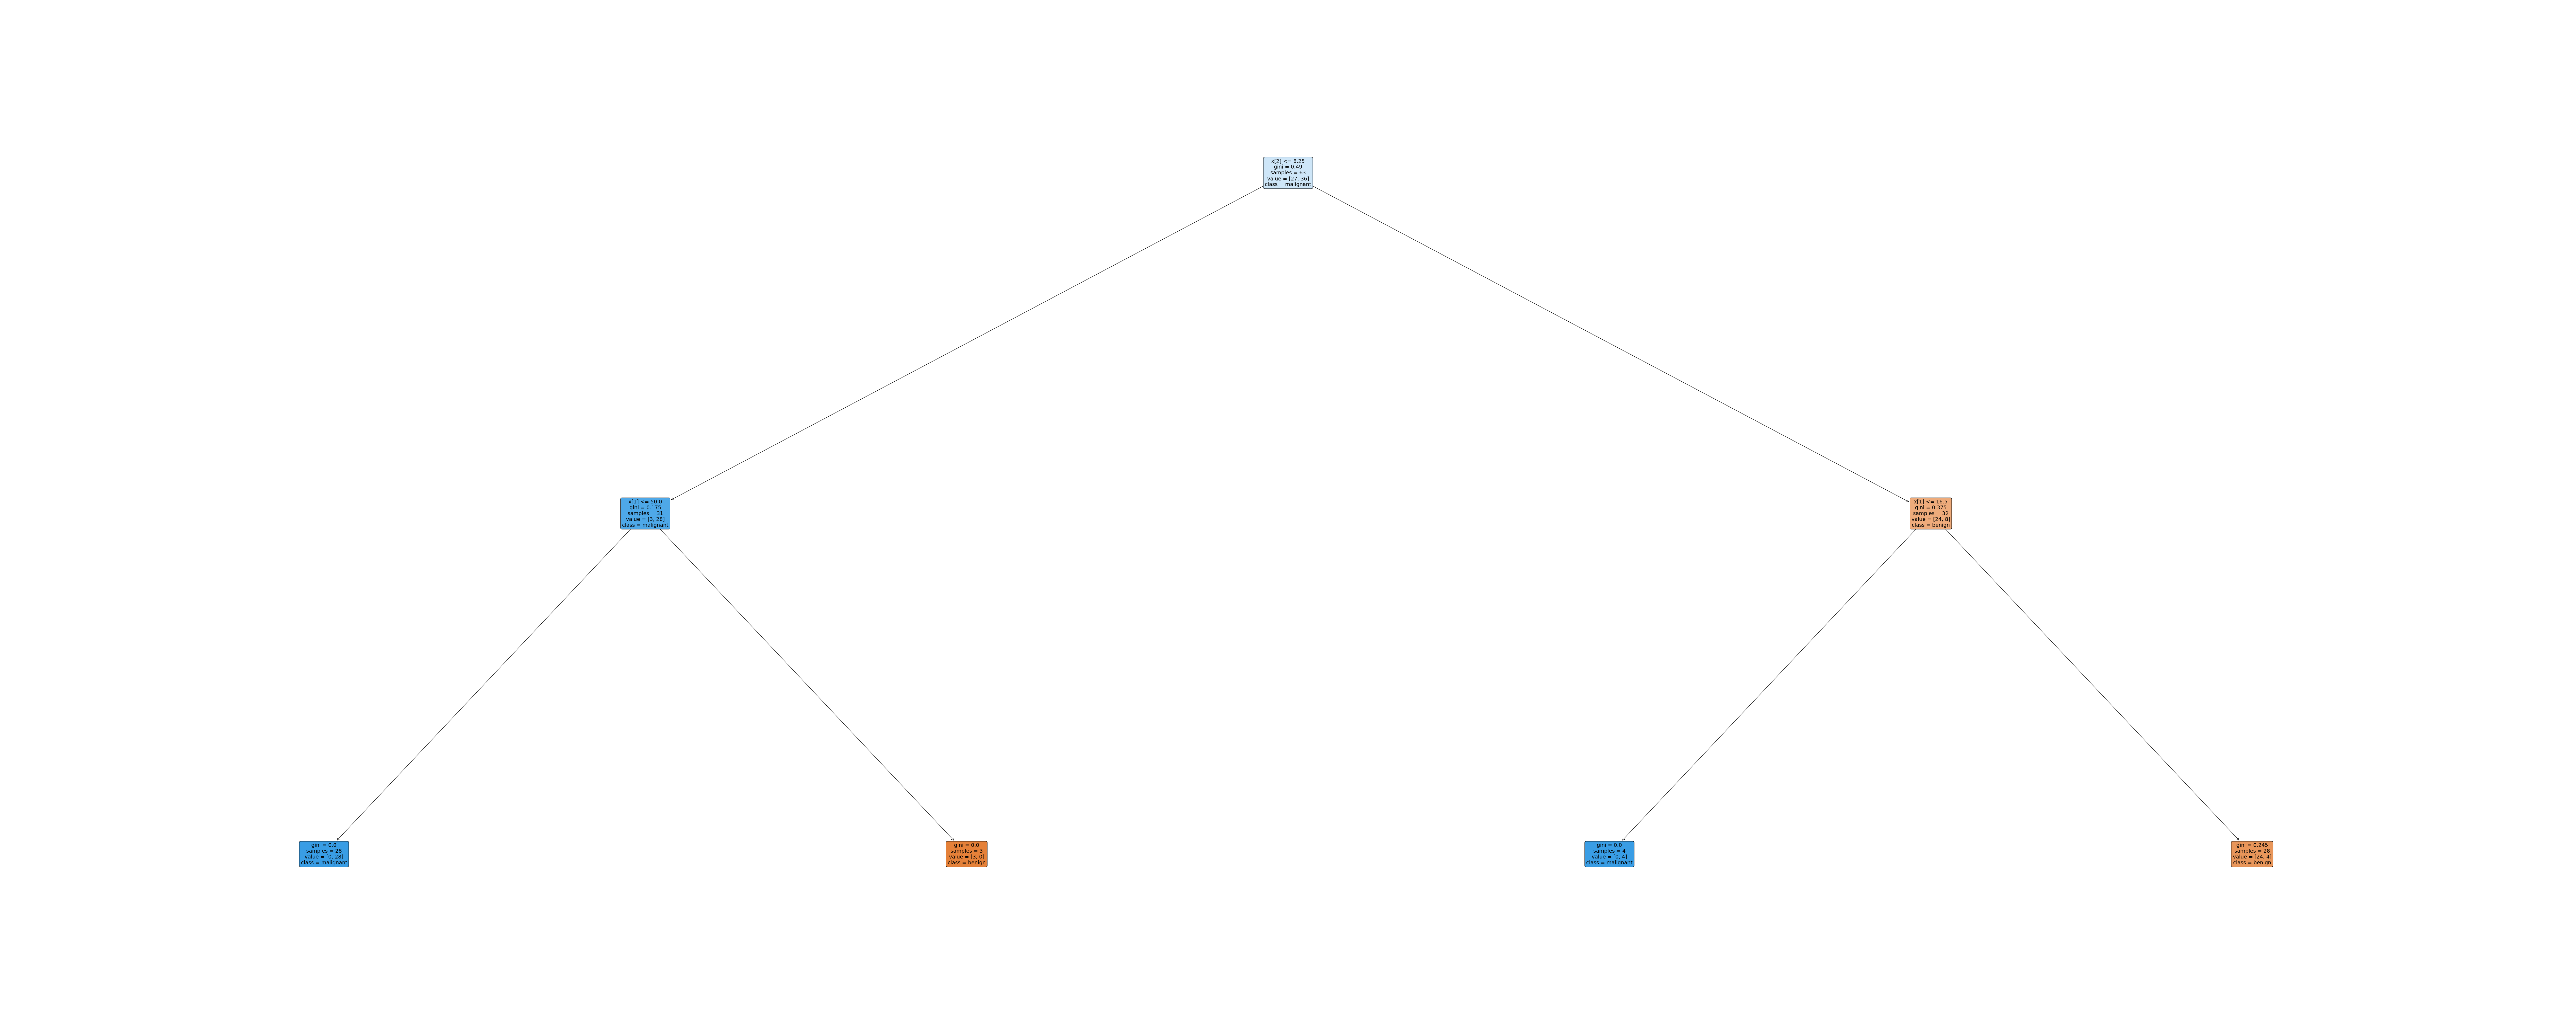

In [6]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(125,50))
tree = plot_tree(grid_search_grid_tree.best_estimator_, 
              #feature_names=train_inputs.columns.values, # our feature names are stripped from the data set
              class_names=['benign', 'malignant'], 
              filled=True, 
              rounded=True, 
              fontsize=14)

# Choosing the best performing model:

1. Results after hyperparameetr tuning for each model using both grid and random search cv.
                              
                                             Random search cv              Grid search cv             Before tuning  
                                        
1. Logistic regression                       87.064                         87.064                      85.7143

2. SVM Linear Kernel                         85.15                           85.15                      92.3077

3. SVM RBF Kernel                            90.59                            90.59                      81.4815

4. SVM Poly kernel                           83.27                            83.27                      81.4815

5.  Decision trees                           87.51                            92.11                       78.5714


How ever before tuning linear svm is the best model.

After hyper parameter tuning Decision trees is performing best.

If we see grid search give best reuslts than random search cv.

If we observe for linear svm after tuning the value decreased.

1. Firstly , random search is fast than grid search and grid search is exhaustive. 

2. Grid search will give best and is appropriate  to use when the number of hyperparameters is also small.

3. Random search is fast in speed and is appropriate to use space is large, 
   the number of hyperparameters is also large, or if there is uncertainty about the optimal hyperparameter values,
    random search may be a better option.
    
4. There are some reasons why for linear svm value decresed after tuning 

Overfitting: Hyperparameter tuning can sometimes lead to overfitting, where the model becomes too complex and performs well on the training set 
but poorly on the test set. In this case, the metric may improve on the training set but decrease on the test set.

Sampling bias: If the search space for the hyperparameters is too limited, it may not include the optimal set of hyperparameters,
resulting in a decrease in the metric after tuning.

Noisy metric: In some cases, the metric being optimized may be noisy, meaning that it can fluctuate even with small changes in the hyperparameters. 
This can make it difficult to determine the true optimal set of hyperparameters.

Model complexity: Sometimes, the optimal set of hyperparameters may result in a more complex model that is prone to overfitting. 
In this case, the metric may initially improve but then decrease as the model becomes too complex.

# On the whole  The best performance model for my data set is Decision trees and the best metric is F1 score .

# Saving this model for future use (In the question they mentioned)

In [7]:
import pickle

# save model
pickle.dump(grid_search_grid_tree, open(r'C:/Users/Meghanjali/Desktop/Data science programming/ASSIGNMENT 1 MEGHA/best_dec_model.pkl', "wb"))

# If you wish to load this model later, simply use pickle.load method
#loaded_model = pickle.load(open('logistic_model_example01.pkl', "rb"))

# Now this is my assignmnet 1 fitting notebook to the models I am adding the neural network and see how it is performing with my data set and compare this neural network to the best model which i got previously that is decision trees.

# Neural network

In [26]:
%%time

ann = MLPClassifier(hidden_layer_sizes=(60,50,40), solver='adam', max_iter=200)
_ = ann.fit(X_train, y_train)

CPU times: total: 953 ms
Wall time: 378 ms


In [27]:
%%time
y_pred = ann.predict(X_test)

CPU times: total: 15.6 ms
Wall time: 4.57 ms


In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.79      0.92      0.85        12

    accuracy                           0.85        27
   macro avg       0.85      0.86      0.85        27
weighted avg       0.86      0.85      0.85        27



# F1 metric using Randomised search cv for neural net

In [29]:
%%time

score_measure = make_scorer(f1_score , average='macro')
kfolds = 5

param_grid = {
    'hidden_layer_sizes': [ (90,), (80,),(50,30), (40,20), (60,40, 20), (70,50,40)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0, .2, .5, .7, 1],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [0.001, 0.01, 0.1, 0.2, 0.5],
    'max_iter': [5000]
}

ann = MLPClassifier()
grid_search = RandomizedSearchCV(estimator = ann, param_distributions=param_grid, cv=kfolds, n_iter=100,
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = grid_search.fit(X_train, y_train)

bestRecallTree = grid_search.best_estimator_

print(grid_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'solver': 'adam', 'max_iter': 5000, 'learning_rate_init': 0.001, 'learning_rate': 'constant', 'hidden_layer_sizes': (70, 50, 40), 'alpha': 0.7, 'activation': 'tanh'}
CPU times: total: 4.64 s
Wall time: 30.1 s


In [30]:
%%time
y_pred = bestRecallTree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.73      0.85        15
           1       0.75      1.00      0.86        12

    accuracy                           0.85        27
   macro avg       0.88      0.87      0.85        27
weighted avg       0.89      0.85      0.85        27

CPU times: total: 0 ns
Wall time: 12.1 ms


# F1 metric using grid search cv for neural network

In [12]:
%%time

score_measure = make_scorer(f1_score , average='macro')
kfolds = 5

param_grid = {
    'hidden_layer_sizes': [ (30,), (50,), (70,), (90,)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam'],
    'alpha': [.5, .7, 1],
    'learning_rate': ['adaptive', 'invscaling'],
    'learning_rate_init': [0.005, 0.01, 0.15],
    'max_iter': [5000]
}

ann = MLPClassifier()
grid_search = GridSearchCV(estimator = ann, param_grid=param_grid, cv=kfolds, 
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = grid_search.fit(X_train, y_train)

bestRecallTree = grid_search.best_estimator_

print(grid_search.best_params_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
{'activation': 'tanh', 'alpha': 0.7, 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling', 'learning_rate_init': 0.01, 'max_iter': 5000, 'solver': 'adam'}
CPU times: total: 3.14 s
Wall time: 37.8 s


In [13]:
%%time
y_pred = bestRecallTree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.73      0.85        15
           1       0.75      1.00      0.86        12

    accuracy                           0.85        27
   macro avg       0.88      0.87      0.85        27
weighted avg       0.89      0.85      0.85        27

CPU times: total: 15.6 ms
Wall time: 14.5 ms


# Anlaysis:
1. How ever, from the previous model i got decision tree as the best model and the value of f1 metric after hyper parameter tuning is 92.11 for grid search cv which is best value.
2. If we see the neural network model the value of f1 metric after hyper parameter tuning is 85 percent for both grid and random search.
3. I have tried by passing differnet number of hiddlen layer neurons.
4. By comparing the results i can say that decision trees are performing well for my data set compared to neural networks.
5. So, decision trees is still considered to be the best model for my dataset even after adding the neural network model to my data set.